# Regression and Other Stories: Residuals

Plotting the data and fitted model. See Chapter 11 in Regression and Other Stories.

-----

### Load packages

In [1]:
using Turing, MCMCChains, Random, StatsPlots, DataFrames, LaTeXStrings

## Simple model with const term, one pre-treatment predictor, and treatment indicator

### Fake data

In [2]:
N = 100
x = rand(Uniform(0,1), N)
z = sample([0,1], N, replace=true)
a = 1
b = 2
theta = 5
sigma = 2
y = a .+ b*x .+ theta*z .+ rand(Normal(0, sigma), N)
fake = DataFrame(Dict(
        "x"=>x,
        "y"=>y,
        "z"=>z
        ));

### Model

In [3]:
@model function m1(x, z, y)
    
    σ ~ truncated(Normal(0, 10), 0, Inf)
    α ~ Normal(0,10)
    βx ~ Normal(0,10)
    βz ~ Normal(0,10)
    
    μ = α .+ βx * x + βz * z
    
    y ~ MvNormal(μ, σ)
end;

In [4]:
model1 = m1(fake.x, fake.z, fake.y)
chain = sample(model1, NUTS(), 4000)
summarystats(chain)

┌ Info: Found initial step size
│   ϵ = 0.2
└ @ Turing.Inference C:\Users\tburch\.julia\packages\Turing\pwMQO\src\inference\hmc.jl:188
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:02


Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat    ⋯
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64    ⋯

           α    1.4369    0.4060     0.0064    0.0094   1812.6691    1.0023    ⋯
          βx    1.3093    0.6079     0.0096    0.0133   1955.3169    1.0019    ⋯
          βz    5.1865    0.3483     0.0055    0.0075   2588.8925    1.0001    ⋯
           σ    1.7127    0.1230     0.0019    0.0019   3094.9740    1.0000    ⋯
                                                                1 column omitted


### Plot Predictor vs Outcome

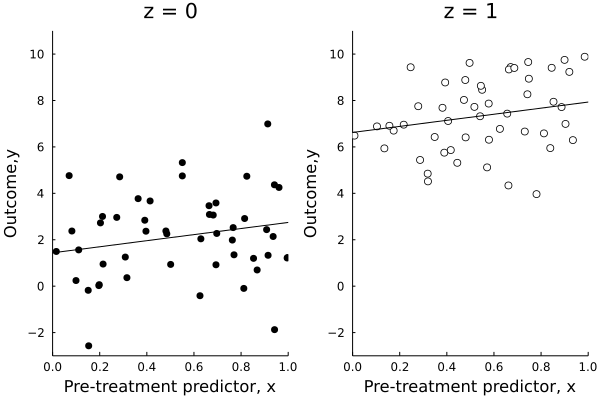

In [5]:
coefs = get(chain, [:α, :βx, :βz])

colors=[:black,:white]
i = 0
p = Array{Union{Missing, Plots.Plot}}(missing,2)
for i in 0:1
    p[i+1] = scatter(
        x[z.==i],
        y[z.==i],
        color=colors[i+1],
        title="z = $(i)",
        ylabel="Outcome,y",
        xlabel="Pre-treatment predictor, x",
        ylim=(-3,11),
        legend=false,
        xlim=(0,1),
        grid=false
    )
    plot!(
        -0.05:.1:1.05,
        x->mean(coefs.α) + mean(coefs.βz) * i + mean(coefs.βx) * x,
        color=:black
    )
end
plot(p[1],p[2],layout=2)

## More complicated model with multiple pre-treatment predictors.

### Fake data 

Creating the linear predictor from the fitted multiple regression model

In [6]:
N = 100
K = 10
X = rand(Uniform(0,1), (N,K))
z = sample([0,1], N, replace=true)
a = 1
b = 1:K
theta = 10
sigma = 5
y = a .+ X * b .+ theta * z .+ rand(Normal(0, sigma), N);

In [7]:
@model function m2(X, z, y)
    
    σ ~ truncated(Normal(0, 10), 0, Inf)
    α ~ Normal(0,10)
    nfeatures = size(X,2)
    βx ~ MvNormal(nfeatures, length(X))
    βz ~ Normal(0,10)
    μ = α .+ X * βx .+ βz * z
    y ~ MvNormal(μ, σ)
end;

### Model

In [8]:
model2 = m2(X, z, y)
fit2 = sample(model2, NUTS(), 4000)
summarystats(fit2)

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\tburch\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\tburch\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\tburch\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\tburch\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat    ⋯
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64    ⋯

           α   -1.3951    2.8888     0.0457    0.0527   3186.9481    1.0000    ⋯
       βx[1]    0.4296    1.8114     0.0286    0.0265   4387.0637    0.9998    ⋯
       βx[2]    0.3191    1.7656     0.0279    0.0272   5126.0163    0.9998    ⋯
       βx[3]    3.1857    1.7306     0.0274    0.0247   4425.8299    0.9999    ⋯
       βx[4]    2.8601    1.7651     0.0279    0.0296   4122.0027    0.9998    ⋯
       βx[5]    5.2122    1.7170     0.0271    0.0255   5423.6506    0.9998    ⋯
       βx[6]    9.1664    1.8142     0.0287    0.0273   4921.7769    1.0003    ⋯
       βx[7]   10.1756    1.7628     0.0279    0.0272   4662.5929    1.0002    ⋯
       βx[8]   10.4517    1.5908     0.0252    0.0232   5326.6479    1.0000    ⋯
       βx[9]    8.3187    1.8131     0.0287    0.0305   4599.2400    0.9998    ⋯
      βx

### Plot predictor vs Outcome

In [9]:
pred_m2 = m2(X, z, missing)
pred_chains = predict(pred_m2, fit2, include_all=true)
y_hat = mean(Array(group(pred_chains, :y)), dims=1) |> transpose;

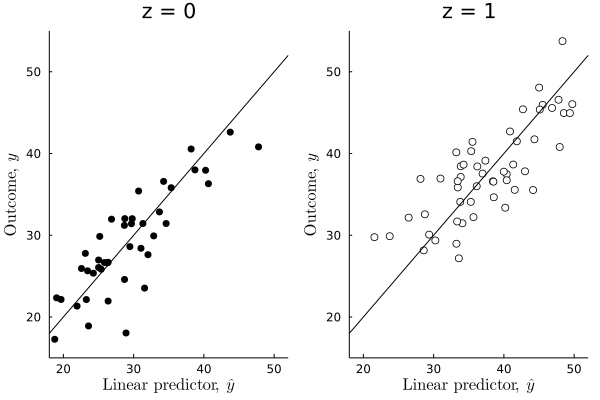

In [10]:
colors=[:black,:white]
i = 0
p = Array{Union{Missing, Plots.Plot}}(missing,2)
for i in 0:1
    p[i+1] = scatter(
        y[z.==i],
        y_hat[z.==i],
        color=colors[i+1],
        title="z = $(i)",
        ylabel=L"\textrm{Outcome, }y",
        xlabel=L"\textrm{Linear predictor, }\hat{y}",
        ylim=(15,55),
        legend=false,
        xlim=(18,52),
        grid=false
    )
    plot!(
        18:52,18:52,
        color=:black
    )

end
plot(p[1],p[2],layout=2)

### Plot Predictor vs Residual

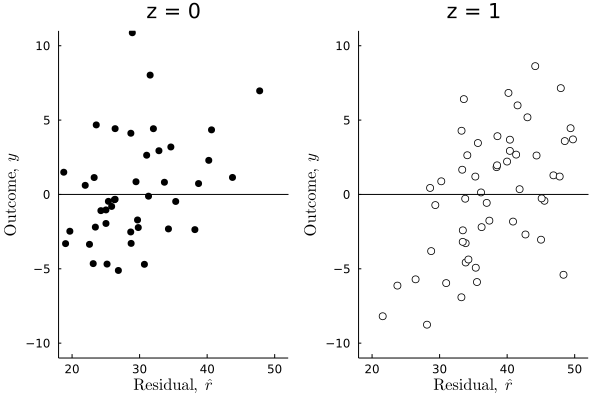

In [11]:
r = y .- y_hat
colors=[:black,:white]
i = 0
p = Array{Union{Missing, Plots.Plot}}(missing,2)
for i in 0:1
    p[i+1] = scatter(
        y[z.==i],
        r[z.==i],
        color=colors[i+1],
        title="z = $(i)",
        ylabel=L"\textrm{Outcome, }y",
        xlabel=L"\textrm{Residual, }\hat{r}",
        ylim=(-11,11),
        legend=false,
        xlim=(18,52),
        grid=false
    )
    hline!([0],color=:black)
end
plot(p[1],p[2],layout=2)